In [1]:
pip install tf-explain

     |████████████████████████████████| 51kB 5.7MB/s 


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
 
import numpy as np
 
import matplotlib.pyplot as plt

In [3]:
model = keras.applications.VGG16(weights='imagenet')


553467904/553467096 [==============================] - 4s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

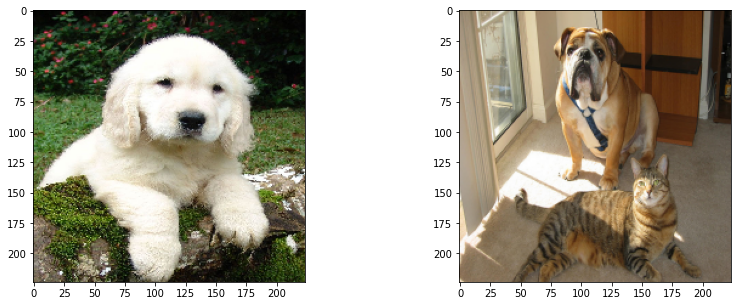

In [5]:
_img = keras.preprocessing.image.load_img('cat_dog.png',target_size=(224,224))
_img1 = keras.preprocessing.image.load_img('cat_dog_1.png',target_size=(224,224))

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
axes[1].imshow(_img1)
plt.show()

In [6]:
img = keras.preprocessing.image.img_to_array(_img)
img_orig = img
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)
print(np.argmax(y_pred))

257


In [7]:
img1 = keras.preprocessing.image.img_to_array(_img1)
img1_orig = img1
img1 = img1.reshape((1, *img1.shape))
y_pred1 = model.predict(img1)
print(np.argmax(y_pred1))

254


# Activations

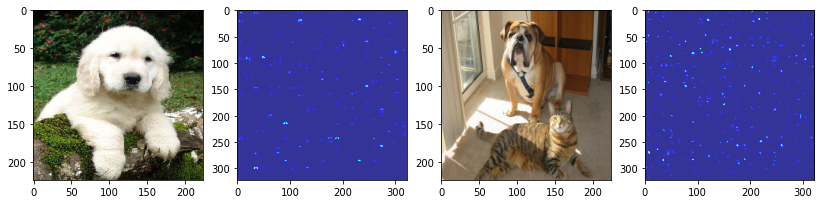

In [9]:
# Import explainer
from tf_explain.core.activations import ExtractActivations

data = ([img], None)
data1 = ([img1], None)

#basenji_dog_class_index = 254
explainer = ExtractActivations()
# Compute ActivationsVisualization on VGG16
#grid = explainer.explain(data, model, basenji_dog_class_index, 20, 1.)
layername = "block5_conv3"
grid = explainer.explain(data,model,layers_name=layername)
grid1 = explainer.explain(data1,model,layers_name=layername)

fig, axes = plt.subplots(1,4,figsize=(14,5))
axes[0].imshow(_img)
axes[1].imshow(grid, cmap="jet",alpha=0.8)
axes[2].imshow(_img1)
axes[3].imshow(grid1, cmap="jet",alpha=0.8)
plt.show()

# SmoothGrad

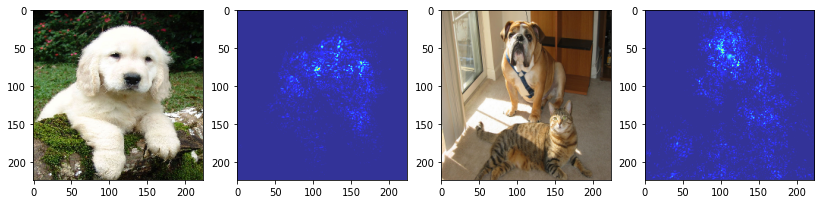

In [27]:
from tf_explain.core.smoothgrad import SmoothGrad


data = ([img_orig], None)
data1 = ([img1_orig], None)

newfoundland_dog_class_index = 257
basenji_dog_class_index = 254

explainer = SmoothGrad()
# Compute SmoothGrad on VGG16
grid = explainer.explain(data, model, newfoundland_dog_class_index, num_samples=20, noise=1.0)
grid1 = explainer.explain(data1, model, basenji_dog_class_index, num_samples=20, noise=1.0)


fig, axes = plt.subplots(1,4,figsize=(14,5))
axes[0].imshow(_img)
axes[1].imshow(grid, cmap="jet",alpha=0.8)
axes[2].imshow(_img1)
axes[3].imshow(grid1, cmap="jet",alpha=0.8)
plt.show()

# Occlusion Sensitivity


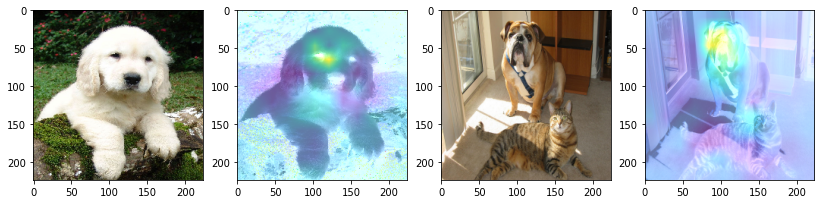

In [28]:
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity


data = ([img_orig], None)
data1 = ([img1_orig], None)

newfoundland_dog_class_index = 257
basenji_dog_class_index = 254

explainer = OcclusionSensitivity()
#Compute Occlusion Sensitivity on VGG16
grid = explainer.explain(data, model, newfoundland_dog_class_index, 20)
grid1 = explainer.explain(data1, model, basenji_dog_class_index, 20)
explainer.save(grid, '.', 'occlusion_sensitivity.png')

fig, axes = plt.subplots(1,4,figsize=(14,5))
axes[0].imshow(_img)
axes[1].imshow(grid, cmap="jet",alpha=0.8)
axes[2].imshow(_img1)
axes[3].imshow(grid1, cmap="jet",alpha=0.8)
plt.show()

# Integrated Gradients

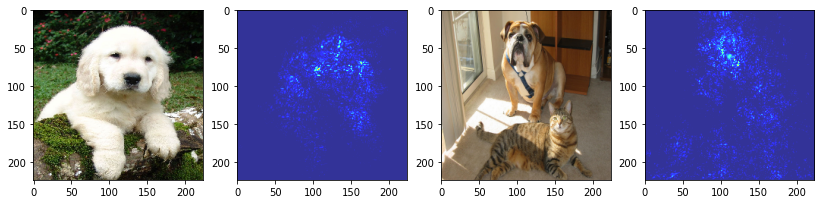

In [32]:
from tf_explain.core.integrated_gradients import IntegratedGradients


data = ([img_orig], None)
data1= ([img1_orig], None)

newfoundland_dog_class_index = 257
basenji_dog_class_index = 254

explainer = IntegratedGradients()
#Compute IntegratedGradients on VGG16
grid = explainer.explain(data, model, newfoundland_dog_class_index, n_steps= 10)
grid1 = explainer.explain(data1, model, basenji_dog_class_index, n_steps= 10)
explainer.save(grid, '.', 'IntegratedGradients.png')

fig, axes = plt.subplots(1,4,figsize=(14,5))
axes[0].imshow(_img)
axes[1].imshow(grid, cmap="jet",alpha=0.8)
axes[2].imshow(_img1)
axes[3].imshow(grid1, cmap="jet",alpha=0.8)
plt.show()